In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
d12=np.linspace(0, 0.001, 100)
sm2=np.linspace(0, 0.2, 100)
N1=np.loadtxt('N1cctoD3.txt', delimiter=',')
N2=np.loadtxt('N2cctoD3.txt', delimiter=',')
for i in range(N1.shape[0]):
    for j in range(N1.shape[1]):
        if math.isnan(N1[i][j]):
            N1[i][j]=N1[i][j+1]
for i in range(N2.shape[0]):
    for j in range(N2.shape[1]):
        if math.isnan(N2[i][j]):
            N2[i][j]=N2[i][j+1]
            
N1=np.fliplr(N1)
N2=np.fliplr(N2)

In [3]:
def ExitenceParser(first, second, level=0.01):
    if (first<level) and (second<level):
        return 0
    if (first>=level) and (second<level):
        return 1
    if (first<level) and (second>=level):
        return 2
    if (first>=level) and (second>=level):
        return 3

In [4]:
mask=np.zeros(N1.shape)
for i in range(d12.shape[0]):
    for j in range(sm2.shape[0]):
        mask[i][j]=ExitenceParser(N1[i][j], N2[i][j])

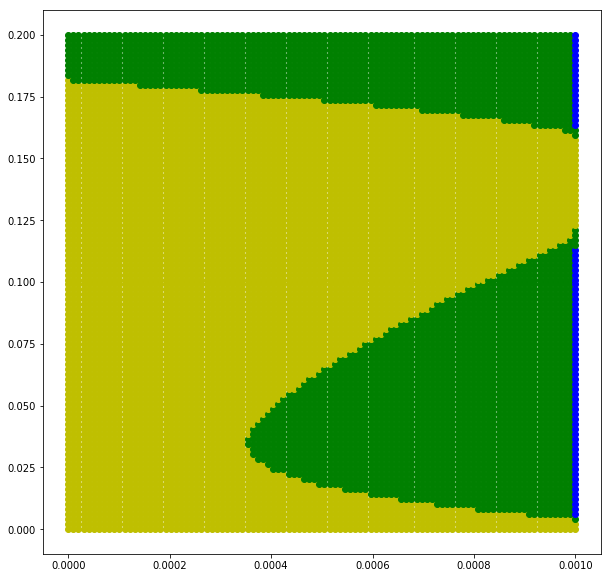

In [5]:
plt.figure(figsize=(10,10))
for i in range(d12.shape[0]):
    for j in range(sm2.shape[0]):
        if mask[i][j]==0:
            plt.plot(d12[i], sm2[j], 'ro')
        if mask[i][j]==1:
            plt.plot(d12[i], sm2[j], 'yo')
        if mask[i][j]==2:
            plt.plot(d12[i], sm2[j], 'bo')
        if mask[i][j]==3:
            plt.plot(d12[i], sm2[j], 'go')
        
plt.show()

In [6]:
def neighbours(i, j, lx, ly):
    ans=[]
    if j>0:
        ans.append((i,j-1))
    if j<ly-1:
        ans.append((i,j+1))
    if i>0:
        ans.append((i-1,j))
    if i<lx-1:
        ans.append((i+1,j))
    return ans

In [7]:
border=[]

for i in range(d12.shape[0]):
    for j in range(sm2.shape[0]):
        nei=neighbours(i, j, d12.shape[0], sm2.shape[0])
        for a in nei:
            if mask[a[0]][a[1]] != mask[i][j]:
                border.append((i,j))

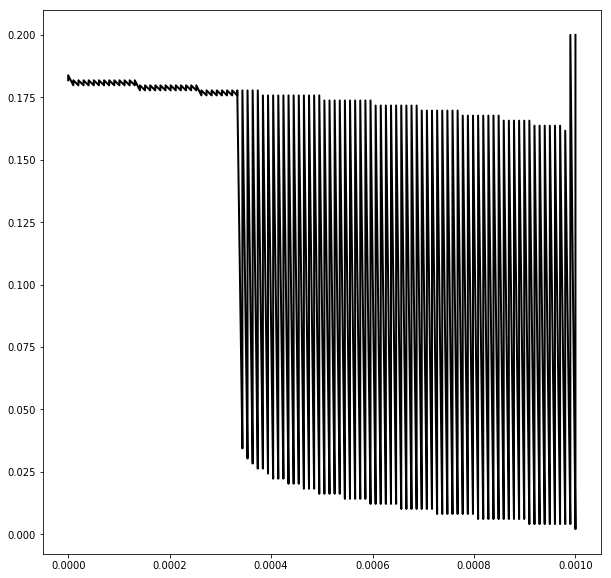

In [8]:
plt.figure(figsize=(10,10))
x, y=zip(*border)
x=np.array(x)
y=np.array(y)
lines=plt.plot(d12[x], sm2[y])
plt.setp(lines, color='k', linewidth=2.0)
plt.show()

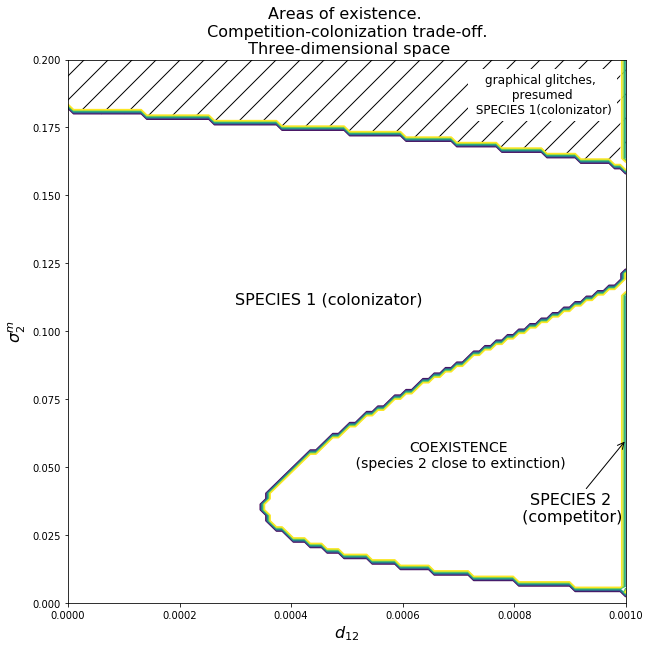

In [27]:
X, Y = np.meshgrid(d12, sm2)

plt.figure(figsize=(10,10))
CS = plt.contour(X, Y, mask.T)
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Areas of existence. \n Competition-colonization trade-off. \n Three-dimensional space', fontsize=16)
plt.text(0.0003, 0.11, r'SPECIES 1 (colonizator)', fontsize=16)

plt.text(0.0007, 0.050, 'COEXISTENCE\n (species 2 close to extinction)', fontsize=14, ha='center')

plt.annotate('SPECIES 2\n (competitor)', fontsize=16, xy=(0.0010, 0.060), xytext=(0.0009, 0.03),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"), ha='center'
            )

top=[]
for x in border:
    if sm2[x[1]]>0.16:
        top.append(x)
x2, y2=zip(*top)
x2=np.array(x2)
y2=np.array(y2)
plt.fill_between(d12[x2], sm2[y2], 0.2, alpha=0, hatch='/')
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="w", lw=2)
plt.text(0.00085, 0.18, 'graphical glitches, \n presumed \n SPECIES 1(colonizator)', fontsize=12, bbox=bbox_props, ha='center')

plt.xlabel('$d_{12}$', fontsize=16)
plt.ylabel('$\sigma^m_2$', fontsize=16)

plt.show()